In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import os
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

X_train = []
Y_train = []
image_size = 150
labels = ['vascular lesion','squamous cell carcinoma','seborrheic keratosis','pigmented benign keratosis','nevus','melanoma','dermatofibroma','basal cell carcinoma','actinic keratosis']
for i in labels:
    folderPath = os.path.join('skin/Skin cancer ISIC The International Skin Imaging Collaboration/train',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('skin/Skin cancer ISIC The International Skin Imaging Collaboration/test',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

model = Sequential([
    Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), padding="same", activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), padding="same", activation='relu'),
    MaxPooling2D(),
    Conv2D(256, (3, 3), padding="same", activation='relu'),
    MaxPooling2D(),
    Conv2D(512, (3, 3), padding="same", activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(9, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 18, 18, 128)      

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

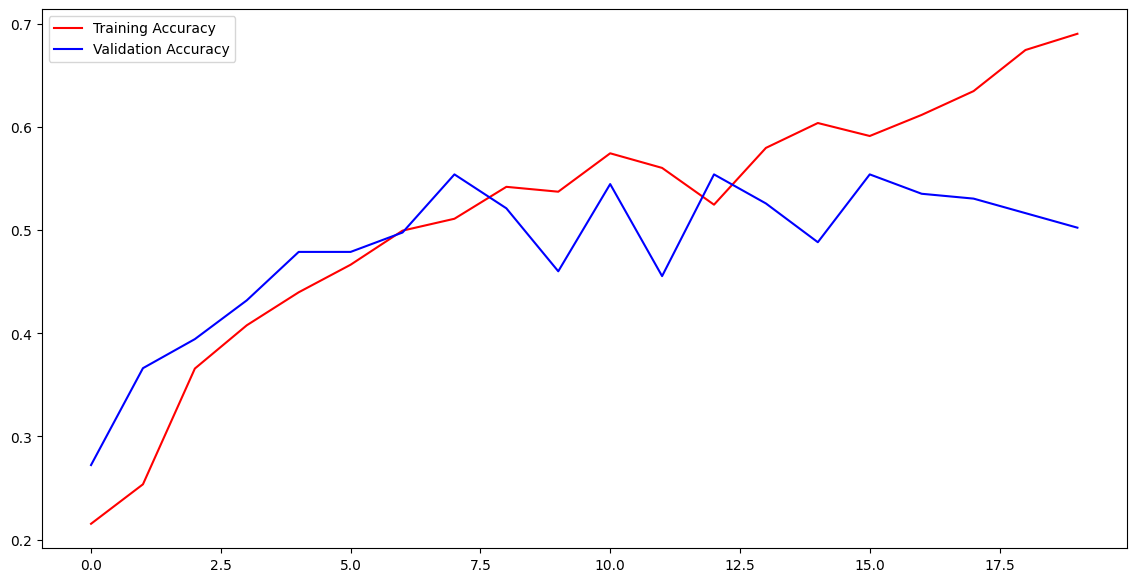

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

In [19]:
img = cv2.imread('skin/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0024435.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [20]:
img = cv2.imread('skin/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0024435.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [21]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape


(1, 150, 150, 3)

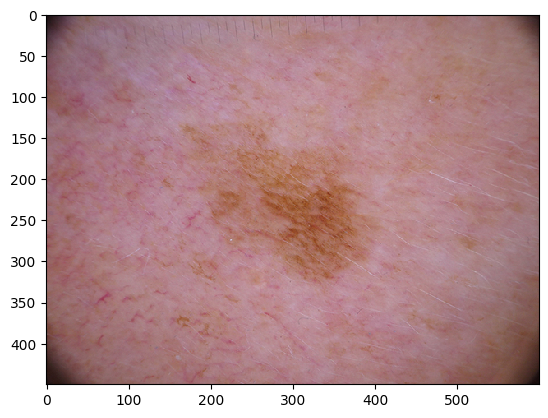

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img('skin/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/ISIC_0024435.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [23]:
a=model.predict(img_array)
tumor_type_mapping = {
    0: 'vascular lesion',
    1: 'squamous cell carcinoma',
    2: 'seborrheic keratosis',
    3: 'pigmented benign keratosis',
    4: 'nevus' ,
    5: 'melanoma',
    6: 'dermatofibroma' , 
    7: 'basal cell carcinoma' , 
    8: 'actinic keratosis'
}
predicted_index = np.argmax(a)
predicted_tumor_type = tumor_type_mapping[predicted_index]
print(predicted_tumor_type)

1/1 [==============================] - 0s 147ms/step
pigmented benign keratosis


In [24]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
# Convert one-hot encoded labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=labels)

print(report)

8/8 [==============================] - 1s 103ms/step
                            precision    recall  f1-score   support

           vascular lesion       0.80      0.84      0.82        19
   squamous cell carcinoma       0.00      0.00      0.00        17
      seborrheic keratosis       0.00      0.00      0.00         8
pigmented benign keratosis       0.45      0.78      0.57        41
                     nevus       0.42      0.62      0.50        37
                  melanoma       0.62      0.37      0.46        41
            dermatofibroma       0.00      0.00      0.00        11
      basal cell carcinoma       0.44      0.57      0.50        42
         actinic keratosis       0.14      0.05      0.07        20

                  accuracy                           0.47       236
                 macro avg       0.32      0.36      0.33       236
              weighted avg       0.41      0.47      0.42       236



C:\Users\pdeva\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pdeva\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pdeva\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i